from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier 
from sklearn import model_selection 
import matplotlib.pyplot as plt
import numpy as np

In [138]:
input_file = 'E://tensorflow//jupyter//machine_learing_damo//2.data//car.data.txt' 
x = []
with open(input_file,'r') as f:
    for line in f.readlines():
        x.append(line[:-1].split(','))
        
x = np.array(x)

# 将数据里的字符转化成编码

In [148]:
label_encoder = []
x_encoded = np.empty(x.shape)

for i,item in enumerate(x[0]):
    label_encoder.append(preprocessing.LabelEncoder())
    x_encoded[:,i] = label_encoder[i].fit_transform(x[:, i]) 
    
X = x_encoded[:, :-1].astype(int)
Y = x_encoded[:, -1].astype(int) 

True

# 建立随机森林分类器

In [140]:
params = {'n_estimators': 200, 'max_depth': 8, 'random_state': 7}
classifier = RandomForestClassifier(**params)
classifier.fit(X, Y) 

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=7)

In [141]:
accuracy = model_selection.cross_val_score(classifier, X, Y, scoring='accuracy', cv=3)
print("Accuracy of the classifier: " + str(round(100*accuracy. mean(), 2)) + "%" )

Accuracy of the classifier: 77.66%


# 对单一数据点分类

In [182]:
input_data = ['vhigh', 'med', '4', '4', 'small', 'high'] 
input_data_encoded = [-1] * len(input_data)
input_data = np.array(input_data).reshape(1,-1)

for i, item in enumerate(input_data[0]):
    input_data_encoded[i] = int(label_encoder[i].transform(input_data[:,i]))


input_data_encoded

[3, 2, 2, 1, 2, 0]

In [183]:
# 预测并打印特定数据点的输出
input_data_encoded = np.array(input_data_encoded).reshape(1,-1)
output_class = classifier.predict(input_data_encoded)
print("Output class:", label_encoder[-1].inverse_transform(output_class)[0])

Output class: acc


# 验证曲线

In [191]:
classifier = RandomForestClassifier(max_depth=4, random_state=7)
parameter_grid = np.linspace(25, 200, 8).astype(int)
train_scores, validation_scores = model_selection.validation_curve(classifier, X, Y, "n_estimators", parameter_grid, cv=5)
print("\n##### VALIDATION CURVES #####")
print("\nParam: n_estimators\nTraining scores:\n", train_scores)
print("\nParam: n_estimators\nValidation scores:\n", validation_scores)

g:\python\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=n_estimators, param_range=[ 25  50  75 100 125 150 175 200] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "



##### VALIDATION CURVES #####

Param: n_estimators
Training scores:
 [[0.80680174 0.80824891 0.80752533 0.80694143 0.81055676]
 [0.79522431 0.80535456 0.81041968 0.80911063 0.81055676]
 [0.80101302 0.80680174 0.81114327 0.81127983 0.81561822]
 [0.8024602  0.80535456 0.81186686 0.80911063 0.8076645 ]
 [0.80028944 0.80463097 0.81114327 0.8076645  0.81272596]
 [0.80390738 0.80535456 0.81041968 0.81127983 0.81706435]
 [0.80390738 0.80463097 0.81114327 0.81344902 0.81778742]
 [0.80390738 0.80607815 0.81114327 0.81344902 0.81778742]]

Param: n_estimators
Validation scores:
 [[0.71098266 0.76589595 0.72543353 0.76811594 0.73333333]
 [0.71098266 0.75433526 0.71965318 0.77101449 0.73333333]
 [0.71098266 0.72254335 0.71965318 0.76521739 0.73623188]
 [0.71098266 0.71387283 0.71965318 0.75942029 0.72753623]
 [0.71098266 0.74277457 0.71965318 0.75942029 0.74202899]
 [0.71098266 0.74277457 0.71965318 0.75942029 0.74782609]
 [0.71098266 0.74566474 0.71965318 0.75942029 0.74492754]
 [0.71098266 0.751

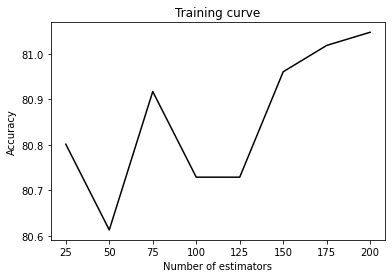

In [192]:
# 画出曲线图
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Training curve') 

plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show() 

In [203]:
classifier = RandomForestClassifier(n_estimators=20, random_state=7)
parameter_grid = np.linspace(2, 10, 5).astype(int)
train_scores, validation_scores = model_selection.validation_curve(classifier, X, Y, "max_depth", parameter_grid, cv=5)
print("\n##### VALIDATION CURVES #####")
print("\nParam: max_depth\nTraining scores:\n", train_scores)
print("\nParam: max_depth\nValidation scores:\n", validation_scores)

g:\python\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=max_depth, param_range=[ 2  4  6  8 10] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "



##### VALIDATION CURVES #####

Param: max_depth
Training scores:
 [[0.71852388 0.70043415 0.70043415 0.69992769 0.69992769]
 [0.80607815 0.80535456 0.80752533 0.80043384 0.80694143]
 [0.90665702 0.91027496 0.92836469 0.89949385 0.90310918]
 [0.97467438 0.96743849 0.96888567 0.97541576 0.96601591]
 [0.99421129 0.99710564 0.99782923 1.         0.99349241]]

Param: max_depth
Validation scores:
 [[0.69942197 0.69942197 0.69942197 0.70144928 0.70144928]
 [0.71098266 0.76589595 0.72543353 0.75942029 0.73333333]
 [0.71387283 0.76300578 0.7283237  0.82898551 0.83768116]
 [0.67630058 0.78612717 0.78034682 0.79710145 0.88695652]
 [0.6416185  0.76878613 0.75722543 0.80869565 0.87536232]]


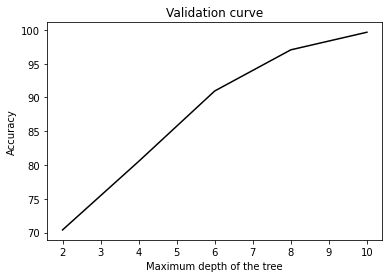

In [204]:
# 画出曲线图
plt.figure()
plt.plot(parameter_grid,100*np.average(train_scores,axis = 1),color='black')
plt.title('Validation curve')
plt.xlabel('Maximum depth of the tree')
plt.ylabel('Accuracy')
plt.show() 

In [221]:
classifier = RandomForestClassifier(n_estimators=200, max_depth= 8,random_state=7)
parameter_grid = np.array([200, 500, 800, 1100])
train_sizes, train_scores, validation_scores = model_selection.learning_curve(classifier, X, Y, train_sizes=parameter_grid, cv=5)
print("\n##### LEARNING CURVES #####")
print("\nTraining scores:\n", train_scores)
print("\nValidation scores:\n", validation_scores) 


##### LEARNING CURVES #####

Training scores:
 [[1.         1.         1.         1.         1.        ]
 [1.         1.         0.996      0.996      0.996     ]
 [0.99625    0.9925     0.99625    0.9975     0.9975    ]
 [0.98545455 0.98181818 0.98272727 0.99636364 0.99636364]]

Validation scores:
 [[0.69942197 0.69942197 0.69942197 0.70144928 0.70144928]
 [0.71387283 0.77456647 0.76589595 0.76521739 0.70144928]
 [0.71387283 0.78612717 0.62138728 0.76521739 0.76811594]
 [0.71387283 0.78612717 0.73699422 0.77391304 0.76811594]]


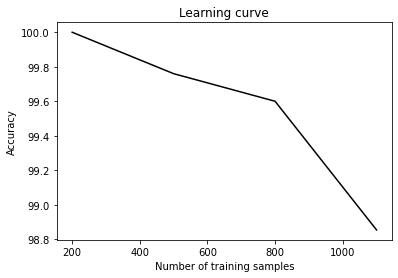

In [222]:
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Learning curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show() 